In [2]:
!pip install matplotlib
!pip install seaborn
!pip install openpyxl
!pip install sklearn


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [50]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
cur_path = os.getcwd()
print(cur_path)

c:\Users\dongy\OneDrive\바탕 화면\MML_project


In [55]:
data = pd.read_excel(os.path.join(cur_path,"Food Delivery Time Prediction Case Study.xlsx"))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [56]:
# 위도,경도가 음수인 것을 발견하여 삭제 처리  -> 4071개의 정보가 삭제되었다. 
data = data[data['Restaurant_latitude']> 0]
data = data[data['Restaurant_longitude']> 0]
data = data[data['Delivery_location_latitude']> 0]
data = data[data['Delivery_location_longitude']> 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41522 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           41522 non-null  object 
 1   Delivery_person_ID           41522 non-null  object 
 2   Delivery_person_Age          41522 non-null  int64  
 3   Delivery_person_Ratings      41522 non-null  float64
 4   Restaurant_latitude          41522 non-null  float64
 5   Restaurant_longitude         41522 non-null  float64
 6   Delivery_location_latitude   41522 non-null  float64
 7   Delivery_location_longitude  41522 non-null  float64
 8   Type_of_order                41522 non-null  object 
 9   Type_of_vehicle              41522 non-null  object 
 10  Time_taken(min)              41522 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [57]:
# 위도,경도를 정보를 이용하여 출발지와 목적지와의 거리 계산을 하는 함수 
def haversine(dataframe):
    # 지구 반경 (km)
    R = 6371.0

    # 위도, 경도를 라디안으로 변환
    lat1_rad = math.radians(dataframe['Restaurant_latitude'])
    lon1_rad = math.radians(dataframe['Restaurant_longitude'])
    lat2_rad = math.radians(dataframe['Delivery_location_latitude'])
    lon2_rad = math.radians(dataframe['Delivery_location_longitude'])

    # 위도와 경도 차이
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # 허버사인 공식
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # 거리 계산
    distance = R * c

    return distance

data['Distance'] = data.apply(haversine,axis=1)

In [60]:
# Train dataset 과 test dataset을 미리 분리하고, Data에 대한 분석은 train dataset에만 진행한다. 

x = data[['ID','Delivery_person_ID','Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle','Distance']]

y = data[['Time_taken(min)']]




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("훈련 데이터 크기:", x_train.shape)
print("테스트 데이터 크기:", x_test.shape)


훈련 데이터 크기: (33217, 11)
테스트 데이터 크기: (8305, 11)


In [8]:
# feature와 배달 시간과의 관계를 나타내주는 함수
def plotter(df,attr,answer):

    x = df[attr].nunique()
    plt.scatter(df[attr], answer)
    plt.title(f'Scatter Plot of {attr} vs time_taken')
    plt.xlabel(f'{attr}')
    plt.ylabel('Time_taken')
    plt.show()
    print(f"nunique: {x}")
    print()
    df[attr].value_counts()
    if x<50:

        concatenated_df = pd.concat([df, answer], axis=1)  # axis=0 for vertical concatenation
        sns.violinplot(x= attr, y="Time_taken(min)", data=concatenated_df)
        plt.title(f"Violin Plot of {attr} vs time_taken")
        plt.show()



    return None



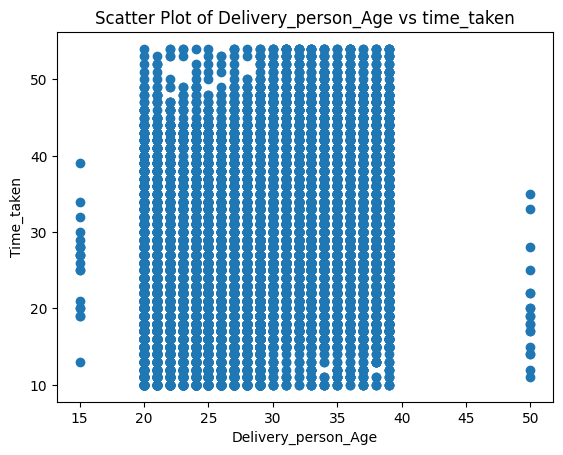

nunique: 22



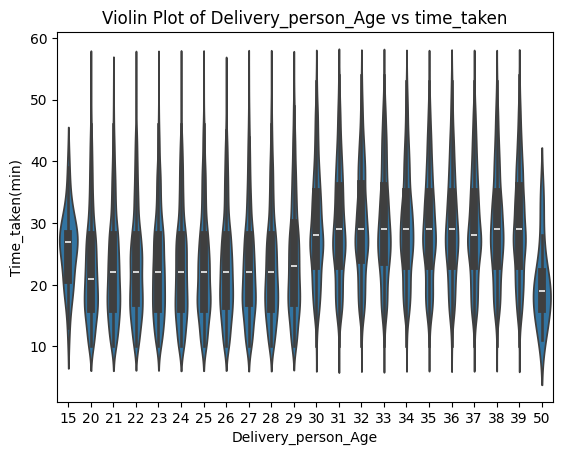

In [10]:
# 배달원 나이와 배달 시간과의 관계를 나타낸 표 
plotter(x_train,'Delivery_person_Age',y_train)

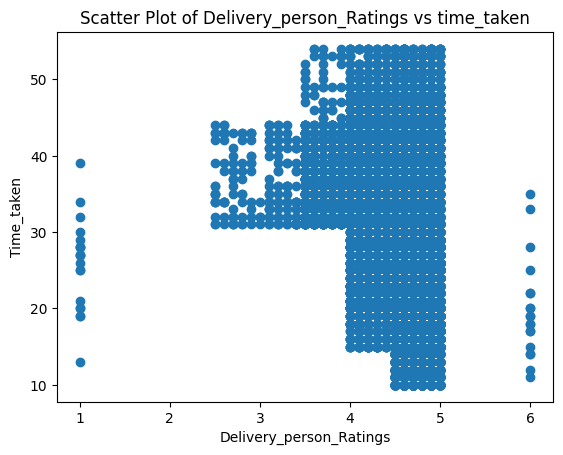

nunique: 28



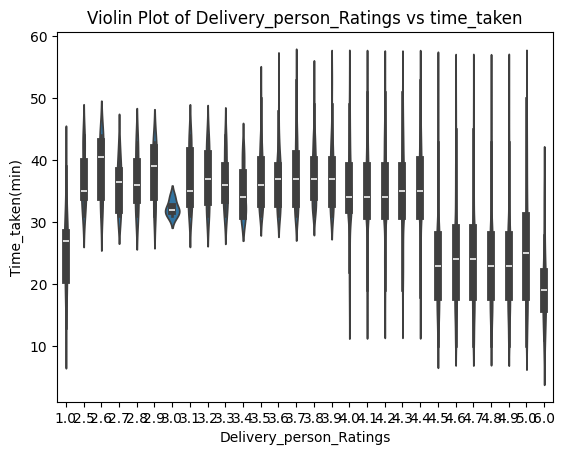

In [11]:
# 배달원 평가와 배달 시간과의 관계를 나타낸 표
plotter(x_train,'Delivery_person_Ratings',y_train)

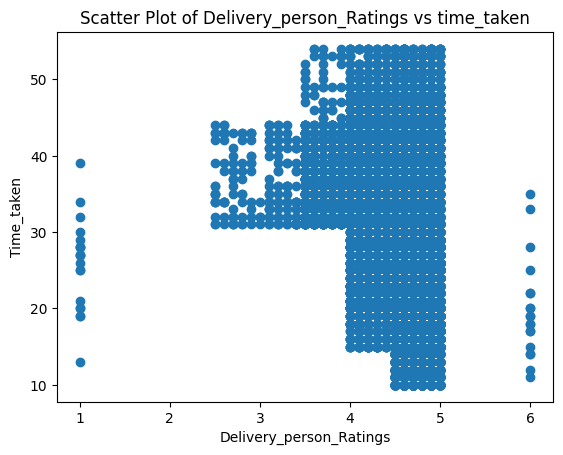

nunique: 28



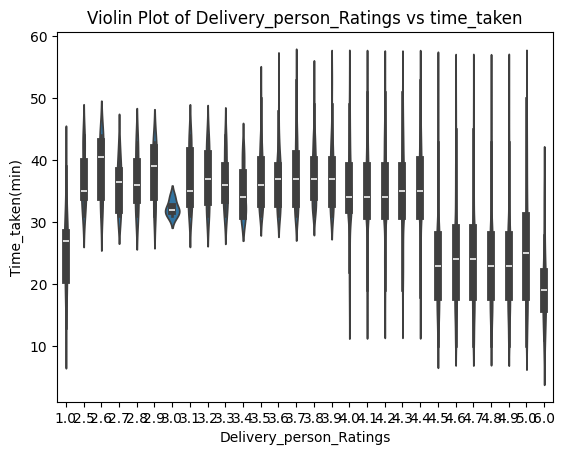

In [12]:
# 배달 종류와 배달 시간과의 관계를 나타낸 표
plotter(x_train,'Delivery_person_Ratings',y_train)

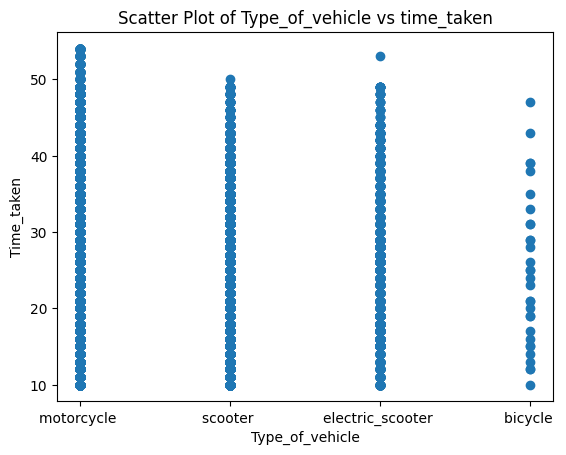

nunique: 4



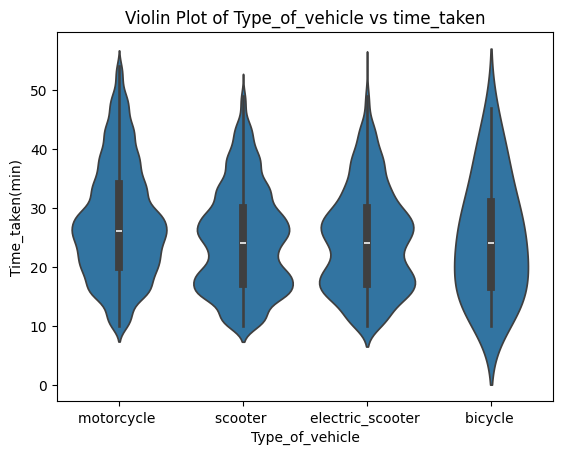

In [13]:
# 이동 수단과 배달 시간과의 관계를 나타낸 표
plotter(x_train,'Type_of_vehicle',y_train)

In [14]:
x_train.value_counts('Type_of_vehicle')

Type_of_vehicle
motorcycle           19309
scooter              11115
electric_scooter      2762
bicycle                 31
dtype: int64

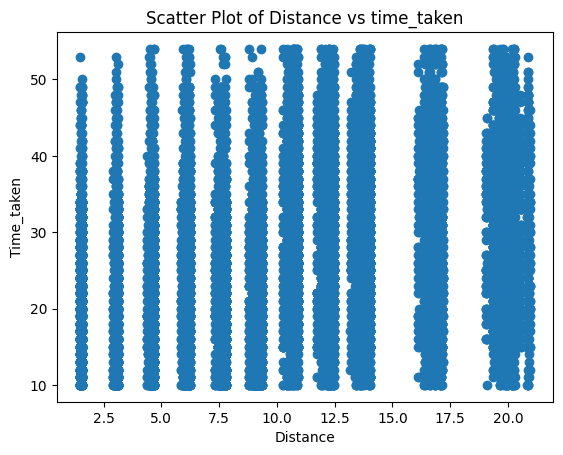

nunique: 4318



In [32]:
# 배달 거리와 배달 시간과의 관계를 나타낸 표표
plotter(x_train,'Distance',y_train)


In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33217 entries, 20667 to 42684
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           33217 non-null  object 
 1   Delivery_person_ID           33217 non-null  object 
 2   Delivery_person_Age          33217 non-null  int64  
 3   Delivery_person_Ratings      33217 non-null  float64
 4   Restaurant_latitude          33217 non-null  float64
 5   Restaurant_longitude         33217 non-null  float64
 6   Delivery_location_latitude   33217 non-null  float64
 7   Delivery_location_longitude  33217 non-null  float64
 8   Type_of_order                33217 non-null  object 
 9   Type_of_vehicle              33217 non-null  object 
 10  Distance                     33217 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.0+ MB


In [61]:
from sklearn.preprocessing import LabelEncoder
x_train['Type_of_vehicle'].value_counts()


motorcycle           19309
scooter              11115
electric_scooter      2762
bicycle                 31
Name: Type_of_vehicle, dtype: int64

In [62]:
x_test['Type_of_vehicle'].value_counts()

motorcycle           4888
scooter              2763
electric_scooter      642
bicycle                12
Name: Type_of_vehicle, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(x_train['Type_of_vehicle'])
x_train['Type_of_vehicle'] = encoder.transform(x_train['Type_of_vehicle'])
x_test['Type_of_vehicle'] = encoder.transform(x_test['Type_of_vehicle'])

In [66]:
x_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Distance
20667,A1B8,BANGRES11DEL03,32,4.8,12.934365,77.616155,13.024365,77.706155,Drinks,2,13.973178
2048,9334,MYSRES16DEL02,21,4.9,12.316967,76.603067,12.366967,76.653067,Meal,2,7.772344
43449,AAFD,CHENRES07DEL02,30,5.0,13.081878,80.248519,13.101878,80.268519,Buffet,3,3.104463
39988,557A,HYDRES14DEL03,20,4.8,17.426228,78.407495,17.516228,78.497495,Meal,3,13.830206
36697,6D3E,INDORES02DEL01,24,4.8,22.651847,75.881991,22.721847,75.951991,Buffet,3,10.590448


In [67]:
x_test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Distance
20051,C37F,AURGRES05DEL01,29,4.6,19.875522,75.367127,19.945522,75.437127,Snack,3,10.683812
34801,9862,MYSRES09DEL01,33,4.6,12.323194,76.630583,12.393194,76.700583,Drinks,2,10.880951
13104,B493,COIMBRES18DEL02,27,4.9,11.020910,76.940432,11.100910,77.020432,Drinks,3,12.463970
11803,CC07,KOCRES11DEL02,24,4.9,10.006881,76.345397,10.086881,76.425397,Buffet,2,12.484185
13824,38D6,INDORES17DEL03,24,4.8,22.761226,75.887522,22.851226,75.977522,Meal,1,13.610825


In [71]:
train = pd.concat([x_train,y_train],axis=1)
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Distance,Time_taken(min)
20667,A1B8,BANGRES11DEL03,32,4.8,12.934365,77.616155,13.024365,77.706155,Drinks,2,13.973178,20
2048,9334,MYSRES16DEL02,21,4.9,12.316967,76.603067,12.366967,76.653067,Meal,2,7.772344,24
43449,AAFD,CHENRES07DEL02,30,5.0,13.081878,80.248519,13.101878,80.268519,Buffet,3,3.104463,15
39988,557A,HYDRES14DEL03,20,4.8,17.426228,78.407495,17.516228,78.497495,Meal,3,13.830206,39
36697,6D3E,INDORES02DEL01,24,4.8,22.651847,75.881991,22.721847,75.951991,Buffet,3,10.590448,13


In [72]:
test = pd.concat([x_test,y_test],axis=1)
test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Distance,Time_taken(min)
20051,C37F,AURGRES05DEL01,29,4.6,19.875522,75.367127,19.945522,75.437127,Snack,3,10.683812,25
34801,9862,MYSRES09DEL01,33,4.6,12.323194,76.630583,12.393194,76.700583,Drinks,2,10.880951,24
13104,B493,COIMBRES18DEL02,27,4.9,11.020910,76.940432,11.100910,77.020432,Drinks,3,12.463970,27
11803,CC07,KOCRES11DEL02,24,4.9,10.006881,76.345397,10.086881,76.425397,Buffet,2,12.484185,20
13824,38D6,INDORES17DEL03,24,4.8,22.761226,75.887522,22.851226,75.977522,Meal,1,13.610825,26


In [73]:
train.to_csv('train.csv')
test.to_csv('test.csv')